#### Exploratory Data Analysis (EDA). 
The data is from an UK online retail, which contains all transactions that occurred from 01/12/2010 to 09/12/2011. The company mainly sells some holiday gifts. Most of the company's customers are wholesalers.

#### Features:
- __InvoiceNo__: Invoice number. Nominal value, 6-digit integer. If the code starts with the letter "c", it means cancellation.
- __StockCode__: Product Code. Nominal value, a unique 5-digit integer assigned to each product
- __Description__: Product name
- __Quantity__：Product quantity
- __InvoiceDate__：Invoice date
- __UnitPrice__：Unit price in pounds.
- __CustomerID__：Customer ID
- __Country__：Country where each customer is located

In [2]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')


In [3]:
# Import data, where IDs are not numerical but strings
df = pd.read_excel("Online Retail.xlsx",dtype={'CustomerID': str,'InvoiceNo': str})

In [4]:
# Copy data and have a look at head
df_eda = df.copy()
df_eda.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### EDA

* Check data basic information

In [5]:
# Summary statistics for numerical columns
df_eda.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
# Check data types and null
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print('Dataframe dimensions:', df_eda.shape)
df_eda['InvoiceDate'] = pd.to_datetime(df_eda['InvoiceDate'])

Dataframe dimensions: (541909, 8)


In [9]:
# Summary of columns types and ratio of null values
tab_info=pd.DataFrame(df_eda.dtypes).T.rename(index={0:'data type'})
tab_info=tab_info.append(pd.DataFrame(df_eda.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_eda.isnull().sum()/df_eda.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
data type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0,0,0.268311,0,0,0,24.9267,0


In [10]:
#  Check the count of unique values
def unique_counts(df1):
    for i in df1.columns:
        count = df1[i].nunique()
        print(i, ":", count)
unique_counts(df_eda)

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


* Check negative values in data 

In [12]:
# Check negative values in column 'Quantity' and 'UnitPrice', which can be seen in describe
print('count of negative quantity and unitprice:',
      df_eda[(df_eda.Quantity<=0) & (df_eda.UnitPrice<=0)].shape[0])

print('Who are these useres',
      df_eda.loc[(df_eda.Quantity<=0) & (df_eda.UnitPrice<=0), 
                 ['CustomerID']].CustomerID.unique())

print('The quantity is less than or equal to 0:',
      df_eda[(df_eda.Quantity<=0)].shape[0])

print('Who are these useres ',
      df_eda.loc[(df_eda.Quantity<=0), ['CustomerID']].CustomerID.unique())

print('\n% ratio: {:3.2%}'.format(df_eda[(df_eda.Quantity<=0)].shape[0]/df_eda.shape[0]))

print('If the number of purchases with user ID is less than 0, the invoice will be :', 
      df_eda.loc[(df_eda.Quantity<=0) & ~(df_eda.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())

count of negative quantity and unitprice: 1336
Who are these useres [nan]
The quantity is less than or equal to 0: 10624
Who are these useres  ['14527' '15311' '17548' ... '12985' '15951' '16446']

% ratio: 1.96%
If the number of purchases with user ID is less than 0, the invoice will be : ['C']


In [14]:
# Drop null customerID
df_eda = df_eda[~(df_eda.CustomerID.isnull())]

# Drop negative quantity and unitprice
df_eda = df_eda[~(df_eda.Quantity<0)]
df_eda = df_eda[df_eda.UnitPrice>0]



note: drop null customerID and negative quantity and unitprice

* Check data in column 'Country'

In [15]:
df_eda.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [23]:
customer_country = df_eda.groupby(['Country'])['CustomerID'].aggregate('count').reset_index()
customer_country

,Country,CustomerID
0,Australia,1182
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32
5,Canada,151
6,Channel Islands,748
7,Cyprus,614
8,Czech Republic,25
9,Denmark,380


In [25]:
customer_country['Percentage'] = round(customer_country['CustomerID']/sum(customer_country['CustomerID'])*100,2)
customer_country = customer_country.sort_values('Percentage',ascending=False)
customer_country


,Country,CustomerID,Percentage
35,United Kingdom,354321,89.05
14,Germany,9040,2.27
13,France,8341,2.10
10,EIRE,7236,1.82
30,Spain,2484,0.62
23,Netherlands,2359,0.59
3,Belgium,2031,0.51
32,Switzerland,1841,0.46
26,Portugal,1462,0.37
0,Australia,1182,0.30


note: It can be seen that most customers were from UK.

* Add a new column to show total price customers paid

In [28]:
df_eda['amount'] = df_eda.Quantity*df_eda.UnitPrice

* Data visualisation

1) Total Sales vs Country

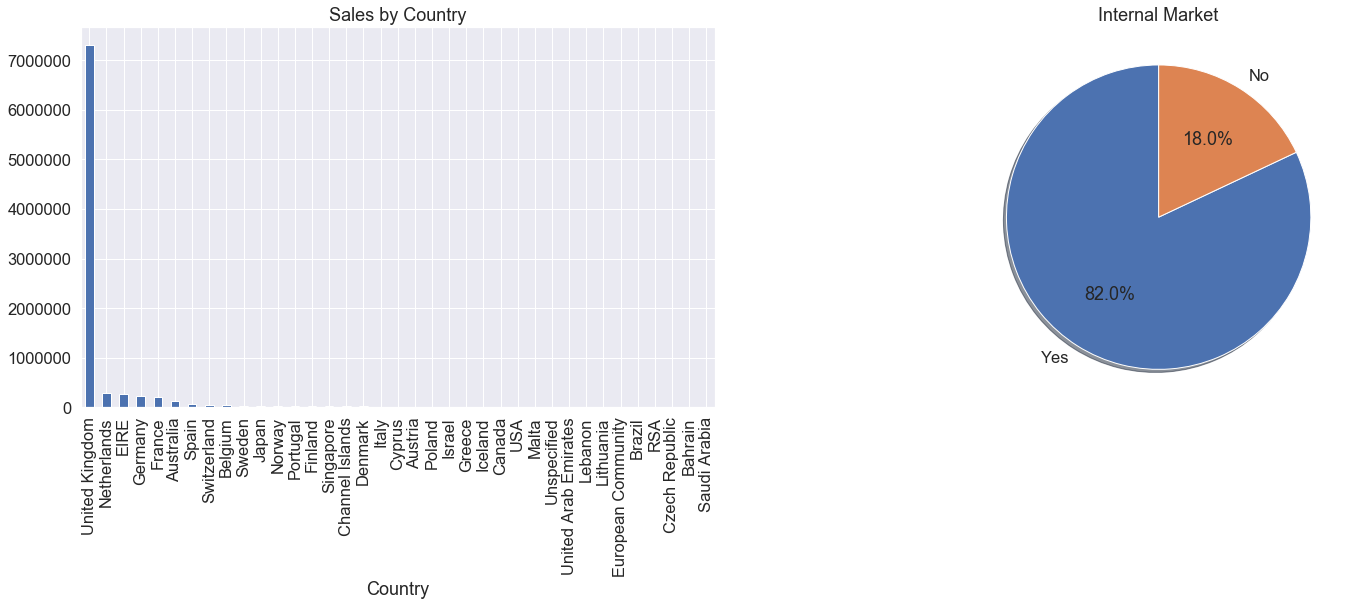

In [30]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
g = df_eda.groupby(["Country"]).amount.sum().sort_values(ascending = False).plot(kind='bar', title='Sales by Country')
df_eda['Internal'] = df_eda.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
f2 = fig.add_subplot(122)
market = df_eda.groupby(["Internal"]).amount.sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')
plt.show()

2) Date vs Total Sale

In [32]:
# Check the latest and oldest sale date
print(df_eda['InvoiceDate'].min())
print(df_eda['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


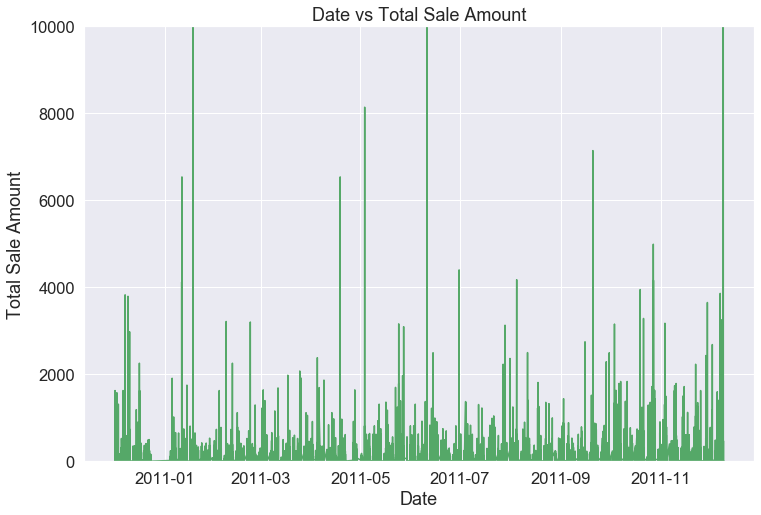

In [35]:
plt.figure(figsize=(12,8))
plt.plot(df_eda['InvoiceDate'],df_eda['amount'],color='g')
plt.xlabel('Date')
plt.ylabel('Total Sale Amount')
plt.title('Date vs Total Sale Amount')
plt.ylim(0,10000)
plt.show()

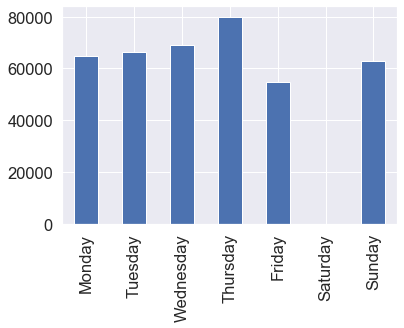

In [41]:
df_eda['Weekday'] = df_eda['InvoiceDate'].dt.weekday
df_eda['weekday_name'] = df_eda['InvoiceDate'].dt.weekday_name

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

df_eda['DAY_OF_WEEK'] = pd.Categorical(df_eda['weekday_name'], categories=days, ordered=True)
crashes_by_day = df_eda['DAY_OF_WEEK'].value_counts()
crashes_by_day = crashes_by_day.sort_index()
crashes_by_day.plot(kind='bar')

3) top 50, top 10 customers contribution to sale

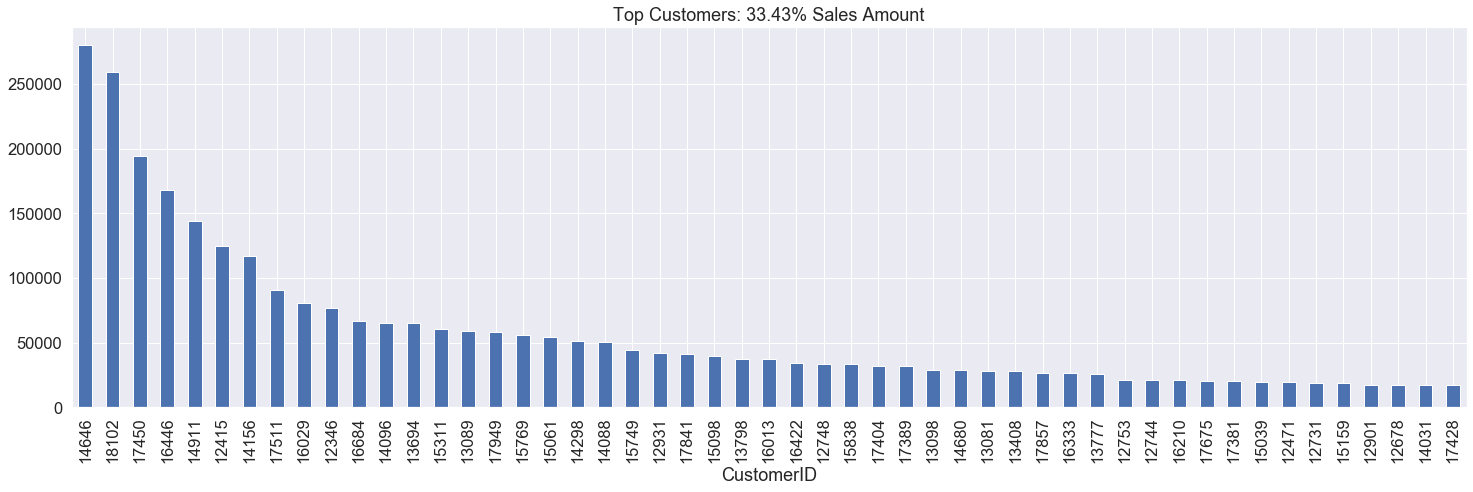

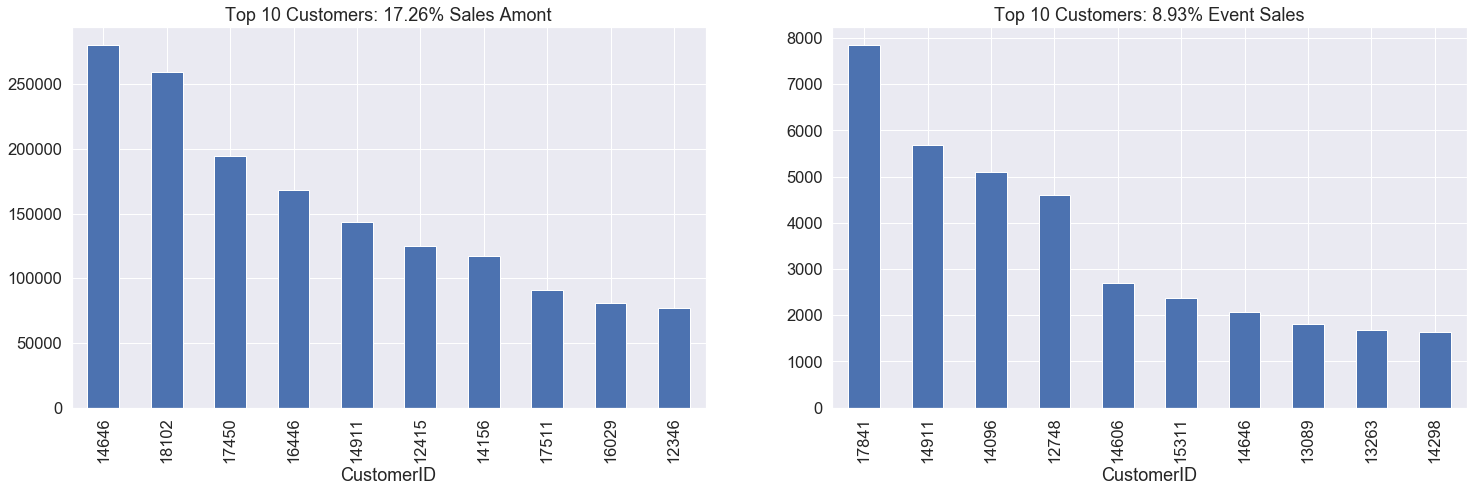

In [38]:

fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((df_eda.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending = False)[:51].sum()/df_eda.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending = False).sum()) * 100, 2)

g = df_eda.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales =  np.round((df_eda.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending = False)[:10].sum()/df_eda.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = df_eda.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amont'.format(PercentSales))
f1 = fig.add_subplot(122)
PercentSales =  np.round((df_eda.groupby(["CustomerID"]).amount.count().\
                          sort_values(ascending = False)[:10].sum()/df_eda.groupby(["CustomerID"]).\
                          amount.count().sort_values(ascending = False).sum()) * 100, 2)
g = df_eda.groupby(["CustomerID"]).amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))

In [42]:
df_eda.shape

(397884, 13)

In [44]:
df_eda.duplicated().sum()

5192

In [43]:
df_eda.to_excel('processed data.xlsx')